In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
!python -m spacy download en_core_web_sm
import seaborn as sns
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np

In [ ]:
text ='''A variable type that stores the memory location of another variable
It's a variable that stores the address of another variable
Pointer is a variable whose value is the address of another variable
Pointer is a variable that stores the address of a variable of its datatype
Pointer is Mouse point 
It is a variable that points to the address of another variable(stores the address of it)
Pointer is a one which stores the  memory address of another variable
Pointer is used to store memory address
An object used to store memory address
Variable that stores the address of another variable with same data type.
pointer is the variable containing the address of another variable.
Pointer is a reference to a memory location.
Pointer which stores address of the variable
A variable which carries a address as a value of another variable
It stores the memory address
Pointer is a variable that holds address of a variable.
A pointer is a variable that stores a memory address.Pointers are used to store the addresses of the other variables or memory items
Pointer is something that stores memory location along with the datatype of a variable
Variable with the address of another variable 
a pointer is an object in many programming languages that stores a memory address
It is a variable which is used to denote the address of other variable.
A object pointing to something
Pointer is a variable that stores the address of the other variable. 
It is a variable that stores a memory address
Pointer is the object that store a memory address .
A pointer is an object used to store the memory location of variable of same datatype.
A pointer is a variable that stores a memory address 
Pointer is a variable which generally holds the address of the variable.If a varible declared with pointer (*) the address(memory location)of that variable is obtained.
Pointers are used to store the address of  variables or memory items and it is necessary for dynamic memory allocation.
'''

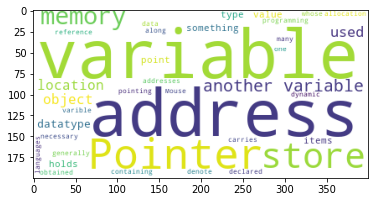

In [ ]:
create_cloud(text)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/Score/pointer.csv')
df.head()

,Pointer,Score
0,A variable type that stores the memory locatio...,1.75
1,It's a variable that stores the address of ano...,1.50
2,Pointer is a variable whose value is the addre...,2.00
3,Pointer is a variable that stores the address ...,2.00
4,Pointer is Mouse point,0.00


In [ ]:
class Preprocess:
  def Tokenize(self,datacolumn):
    list =[]
    for i in datacolumn:
      i = word_tokenize(i)
      list.append(i)

    return list
     
  def remove_stopwords(self,datacolumn):
    Stopwords = set(STOPWORDS)
    list=[]
    for i in datacolumn:
      i = [x for x in i if x not in Stopwords]
      list.append(i)
    #print(i)
    return list
  
  def lemmatization(self,datacolumn):
    lemmatizer = WordNetLemmatizer()
    list=[]
    for i in datacolumn:
      list2=[]
      for tokens in i:
        tokens=lemmatizer.lemmatize(tokens)
        list2.append(tokens)
      list.append(list2)
    return list

  def normalize_text(self,text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    return text
  def to_lower(self,datacolumn):
    for i in datacolumn:
      i = [j.lower() for j in i]
    return datacolumn

  def to_string(self,datacolumn):
    for i in range(len(datacolumn)):
      datacolumn[i] = ' '.join([str(elem) for elem in datacolumn[i]])
    return datacolumn
    


In [ ]:
def create_cloud(data):
  cloud  = WordCloud(background_color ='white',max_words= 100,stopwords=set(STOPWORDS))
  cloud.generate(data)
  plt.imshow(cloud)
  plt.show()

In [ ]:
tokens = Preprocess()
for i in range(len(df['Pointer'])):
  df['Pointer'][i] = tokens.normalize_text(df['Pointer'][i])
df['Pointer'] = tokens.Tokenize(df['Pointer'])
df['Pointer'] = tokens.to_lower(df['Pointer'])
df['Pointer'] = tokens.remove_stopwords(df['Pointer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Pointer'] = tokens.lemmatization(df['Pointer'])
df['Pointer'] = tokens.to_string(df['Pointer'])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pointer,Score
0,variable type store memory location another va...,1.75
1,variable store address another variable,1.50
2,pointer variable whose value address another v...,2.00
3,pointer variable store address variable datatype,2.00
4,pointer mouse point,0.00


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorize = CountVectorizer()
vectorized = vectorize.fit_transform(df['Pointer'])
data = pd.DataFrame(data=vectorized.todense(),columns=vectorize.get_feature_names())
data.shape

(29, 38)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtrain,xtest,ytrain,ytest = train_test_split(data,df['Score'],train_size=0.8,random_state = 5)

In [ ]:
lr =LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [ ]:
#!pip install update sklearn.linear_model.SGDRegressor
from  sklearn.linear_model import SGDRegressor
gd = SGDRegressor(loss='squared_loss',alpha=0.00001)
gd.fit(xtrain,ytrain)
pred_y = gd.predict(xtest)

In [ ]:
def mse(pred,true):
  return np.mean((true-pred)**2)

def rmse(pred,true):
  return np.sqrt(mse(pred,true))

def r_squared(true,pred):
    true_mean=true.mean()
    pred_mean=pred.mean()
    sst=((true-true_mean)**2).sum(axis=0)
    sse=((true-pred)**2).sum(axis=0)
    return 1-(sse/sst) #(sst-sse)/sst

In [ ]:
Metrics = pd.DataFrame(data=[['Linear Regression',mse(ypred,ytest),rmse(ypred,ytest),r_squared(ypred,ytest)],['Learning Parameters Algorithm',mse(pred_y,ytest),rmse(pred_y,ytest),r_squared(pred_y,ytest)]],columns=['Model','Mean Squared Error','Root Mean-sq Error','R**2 Error'])
Metrics

,Model,Mean Squared Error,Root Mean-sq Error,R**2 Error
0,Linear Regression,0.888976,0.942855,-0.244166
1,Learning Parameters Algorithm,0.168538,0.410534,0.051826


In [ ]:
from sklearn.metrics import cohen_kappa_score as kpa
#kpa(ytest,ypred)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/Score/pointer_test.csv')

In [ ]:
tokens = Preprocess()
for i in range(len(df1['Pointer'])):
  df1['Pointer'][i] = tokens.normalize_text(df1['Pointer'][i])
df1['Pointer'] = tokens.Tokenize(df1['Pointer'])
df1['Pointer'] = tokens.to_lower(df1['Pointer'])
df1['Pointer'] = tokens.remove_stopwords(df1['Pointer'])

In [ ]:
df1['Pointer'] = tokens.lemmatization(df1['Pointer'])
df1['Pointer'] = tokens.to_string(df1['Pointer'])
df1.head()

,Pointer
0,object store memory address
1,object store memory address
2,pointer store adress variable
3,store memory address
4,pointer address variable


In [ ]:
vectorized = vectorize.transform(df['Pointer'])
data1 = pd.DataFrame(data=vectorized.todense(),columns=vectorize.get_feature_names())
data1.shape

(29, 38)

In [ ]:
len(gd.predict(data1))

29

In [ ]:
data1['Score'] = gd.predict(data1)
data1.head()